https://myoptimizationnotes.blogspot.com/2024/02/monte-carlo-simulation-porta-com.html

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Re-importing pandas after reset and re-defining the simulation
import pandas as pd

# Redefine constants and re-run the simulations for completeness
selling_price = 249
admin_cost = 400000
ad_cost = 600000
mean_demand = 15000
std_dev_demand = 4500
trials = 100

#np.random.seed(42)  # For reproducibility
demands = np.random.normal(mean_demand, std_dev_demand, trials).round(0)
labor_costs = np.random.choice([43, 44, 45, 46, 47], size=trials, p=[0.1, 0.2, 0.4, 0.2, 0.1]).round(2)
parts_costs = np.random.uniform(80, 100, trials).round(2)
profits = (selling_price - labor_costs - parts_costs) * demands - admin_cost - ad_cost

# Creating the DataFrame again with all the necessary columns
df = pd.DataFrame({
    'Trial No': np.arange(1, trials+1),
    'Direct Labor Cost per Unit': labor_costs,
    'Parts Cost per Unit': parts_costs,
    'Units Sold': demands,
    'Profit': profits
})

df


,Trial No,Direct Labor Cost per Unit,Parts Cost per Unit,Units Sold,Profit
0,1,44,83.01,7947.0,-30545.47
1,2,44,93.73,11102.0,235319.54
2,3,47,92.75,18318.0,1001241.50
3,4,44,85.28,8634.0,33662.48
4,5,43,98.25,18944.0,1041216.00
...,...,...,...,...,...
95,96,46,81.00,13725.0,674450.00
96,97,47,87.08,11554.0,327785.68
97,98,46,82.71,13203.0,588188.87
98,99,46,85.07,17605.0,1076157.65


In [54]:
print('Number of Trials',trials)
print('Mean Profit:',df['Profit'].mean().round())
std = df['Profit'].std()
print('Standard Deviation:',round(std,2))
print('Maximum Profit:',df['Profit'].max())
print('Minimum Profit:',round(df['Profit'].min(),2))
No_of_losses = (df['Profit']<0).sum()
print('Number of Losses:',No_of_losses)
print('Probability of Loss',(No_of_losses*100)/trials,"%")

Number of Trials 100
Mean Profit: 643985.0
Standard Deviation: 539210.55
Maximum Profit: 1843321.4
Minimum Profit: -714682.0
Number of Losses: 12
Probability of Loss 12.0 %


<Axes: xlabel='Profit', ylabel='Count'>

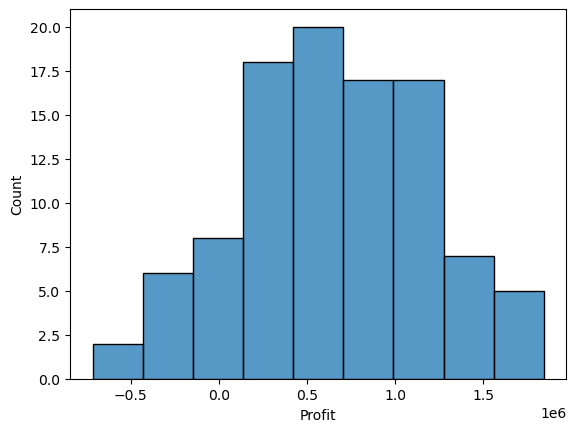

In [55]:
sns.histplot(df['Profit'])